Punto inicial: [ 5 -2]
Mínimo encontrado: [ 3.49085257e-05 -3.49084745e-05]
Valor en el mínimo: 0.33333333357705397
Iteraciones: 571
--------------------------------------------------
Punto inicial: [-1  5]
Mínimo encontrado: [2.03684153 2.03691187]
Valor en el mínimo: 1.5420750333550628
Iteraciones: 563
--------------------------------------------------
Punto inicial: [-4  0]
Mínimo encontrado: [-2.03691182 -2.03684158]
Valor en el mínimo: 1.542075033354366
Iteraciones: 543
--------------------------------------------------


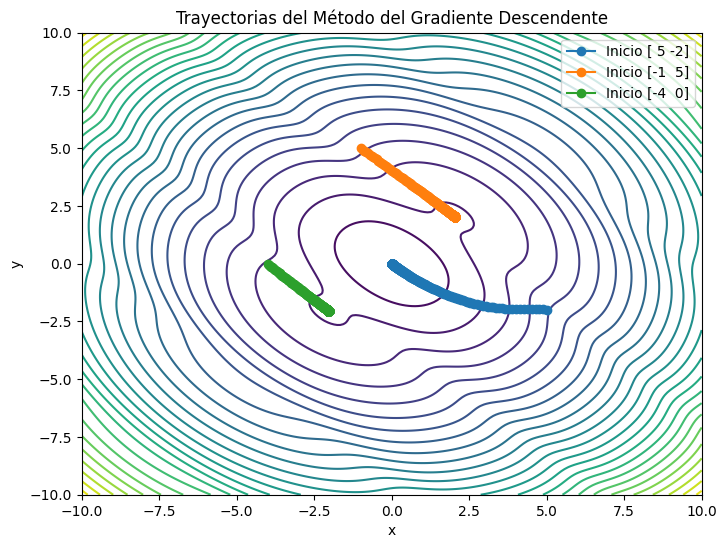

In [6]:
# ==========================================
# MÉTODO DEL GRADIENTE DESCENDENTE
# ==========================================
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo
def f(x, y):
    return 1 / (2 + np.cos(x + y)) + ((x - y)**2 + (x + y)**2) / 20

# Gradiente de f
def grad_f(x, y):
    df_dx = np.sin(x + y) / (2 + np.cos(x + y))**2 + x / 5
    df_dy = np.sin(x + y) / (2 + np.cos(x + y))**2 + y / 5
    return np.array([df_dx, df_dy])

# Parámetros del algoritmo
alpha = 0.1       # tamaño de paso
eps = 1e-6         # tolerancia
max_iter = 1000    # máximo número de iteraciones

# Diferentes puntos de inicio
puntos_iniciales = [np.array([5, -2]), np.array([-1, 5]), np.array([-4, -0])]

resultados_grad = []

for x0 in puntos_iniciales:
    x = x0.copy()
    trayectoria = [x.copy()]
    
    for i in range(max_iter):
        g = grad_f(x[0], x[1])
        x_new = x - alpha * g
        trayectoria.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < eps:
            break
        x = x_new
    
    resultados_grad.append({
        "inicio": x0,
        "minimo": x,
        "valor_minimo": f(x[0], x[1]),
        "iteraciones": i+1,
        "trayectoria": np.array(trayectoria)
    })

# Mostrar resultados
for r in resultados_grad:
    print("Punto inicial:", r["inicio"])
    print("Mínimo encontrado:", r["minimo"])
    print("Valor en el mínimo:", r["valor_minimo"])
    print("Iteraciones:", r["iteraciones"])
    print("-"*50)

# Gráfica del descenso
x_vals = np.linspace(-10, 10, 200)
y_vals = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=30, cmap='viridis')

for r in resultados_grad:
    T = r["trayectoria"]
    plt.plot(T[:,0], T[:,1], 'o-', label=f'Inicio {r["inicio"]}')

plt.title("Trayectorias del Método del Gradiente Descendente")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Punto inicial: [ 5 -2]
Mínimo encontrado: [1.79495462 1.79495462]
Valor en el mínimo: 1.5544379679977585
Iteraciones: 5
--------------------------------------------------
Punto inicial: [-1  5]
Mínimo encontrado: [2.0368767 2.0368767]
Valor en el mínimo: 1.5420750331076731
Iteraciones: 4
--------------------------------------------------
Punto inicial: [-4  0]
Mínimo encontrado: [-2.0368767 -2.0368767]
Valor en el mínimo: 1.5420750331076731
Iteraciones: 4
--------------------------------------------------


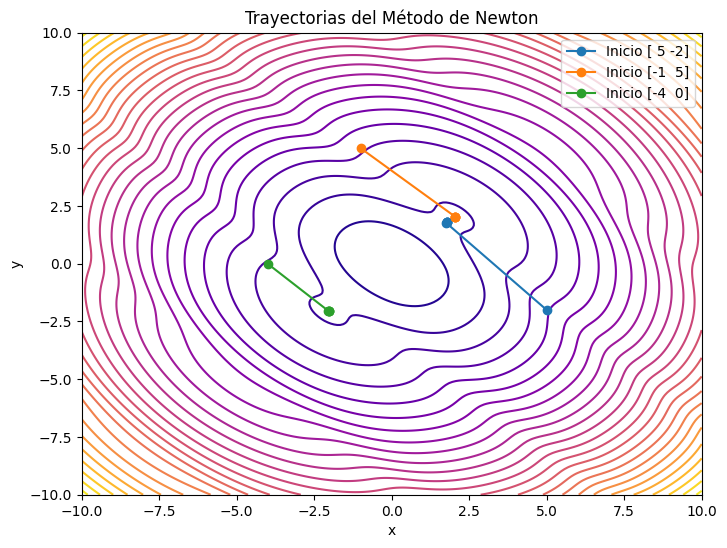

In [3]:
# ==========================================
# MÉTODO DE NEWTON
# ==========================================
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo
def f(x, y):
    return 1 / (2 + np.cos(x + y)) + ((x - y)**2 + (x + y)**2) / 20

# Gradiente
def grad_f(x, y):
    df_dx = np.sin(x + y) / (2 + np.cos(x + y))**2 + x / 5
    df_dy = np.sin(x + y) / (2 + np.cos(x + y))**2 + y / 5
    return np.array([df_dx, df_dy])

# Hessiana
def hessiana_f(x, y):
    num = np.sin(x + y)**2 + 2*np.cos(x + y) + 1
    den = (2 + np.cos(x + y))**3
    h = num / den  # término común
    return np.array([
        [h + 1/5, h],
        [h, h + 1/5]
    ])

# Parámetros
eps = 1e-6
max_iter = 100
puntos_iniciales = [np.array([5, -2]), np.array([-1, 5]), np.array([-4, -0])]

resultados_newton = []

for x0 in puntos_iniciales:
    x = x0.copy()
    trayectoria = [x.copy()]
    
    for i in range(max_iter):
        g = grad_f(x[0], x[1])
        H = hessiana_f(x[0], x[1])
        delta = np.linalg.solve(H, g)   # Resuelve H * delta = grad
        x_new = x - delta
        trayectoria.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < eps:
            break
        x = x_new
    
    resultados_newton.append({
        "inicio": x0,
        "minimo": x,
        "valor_minimo": f(x[0], x[1]),
        "iteraciones": i+1,
        "trayectoria": np.array(trayectoria)
    })

# Mostrar resultados
for r in resultados_newton:
    print("Punto inicial:", r["inicio"])
    print("Mínimo encontrado:", r["minimo"])
    print("Valor en el mínimo:", r["valor_minimo"])
    print("Iteraciones:", r["iteraciones"])
    print("-"*50)

# Gráfica
x_vals = np.linspace(-10, 10, 200)
y_vals = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=30, cmap='plasma')

for r in resultados_newton:
    T = r["trayectoria"]
    plt.plot(T[:,0], T[:,1], 'o-', label=f'Inicio {r["inicio"]}')

plt.title("Trayectorias del Método de Newton")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [4]:
# ==========================================
# COMPARACIÓN ENTRE MÉTODOS
# ==========================================
import pandas as pd

comparacion = []

for g, n in zip(resultados_grad, resultados_newton):
    comparacion.append({
        "Inicio": str(g["inicio"]),
        "Iteraciones Gradiente": g["iteraciones"],
        "Iteraciones Newton": n["iteraciones"],
        "Mínimo Gradiente": np.round(g["minimo"], 4),
        "Mínimo Newton": np.round(n["minimo"], 4)
    })

df = pd.DataFrame(comparacion)
print(df)


    Inicio  Iteraciones Gradiente  Iteraciones Newton    Mínimo Gradiente  \
0  [ 5 -2]                    571                   5         [0.0, -0.0]   
1  [-1  5]                    563                   4    [2.0368, 2.0369]   
2  [-4  0]                    543                   4  [-2.0369, -2.0368]   

        Mínimo Newton  
0      [1.795, 1.795]  
1    [2.0369, 2.0369]  
2  [-2.0369, -2.0369]  


### Nota:

 En este script estan los algoritmos completos unidos para facilitar su observacion.Puede cambiar los puntos iniciales de ambos algoritmos para ver los resultados .Para poder ejecutar el algoritmo de comparacion debe asegurarse de que tanto gradiente descendiente como newton tengan los mismos puntos iniciales.Muchas gracias 